In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/CollegePlacement.csv")

In [3]:
df.head()

,Python,DeepLearning,MachineLearning,BigData,CloudComputing,Placement
0,0.80,0.57,0.63,0.50,0.34,Yes
1,0.81,0.90,0.62,0.71,0.92,No
2,0.49,0.69,0.62,0.64,0.41,No
3,0.40,0.94,0.60,0.26,0.47,No
4,0.31,0.87,1.00,0.23,0.99,No


# **How many rows and columns are there in the dataset?**

In [4]:
df.shape

(200, 6)

# **Can you provide a brief overview of each column in the dataset?**

In [5]:
df.describe()

,Python,DeepLearning,MachineLearning,BigData,CloudComputing
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.514100,0.495850,0.514350,0.495150,0.474950
std,0.305749,0.290694,0.285211,0.292463,0.281686
min,0.000000,0.010000,0.000000,0.010000,0.000000
25%,0.237500,0.227500,0.267500,0.240000,0.227500
50%,0.545000,0.490000,0.540000,0.500000,0.485000
75%,0.800000,0.740000,0.770000,0.740000,0.702500
max,1.000000,1.000000,1.000000,1.000000,0.990000


# **What is the data type of the "Placement" column?**

In [15]:
df["Placement"].dtype

dtype('O')

# **How do you check for missing values in the dataset?**

In [9]:
df.isnull().sum()

Python             0
DeepLearning       0
MachineLearning    0
BigData            0
CloudComputing     0
Placement          0
dtype: int64

# **What percentage of students got placed in this dataset?**

In [10]:
df["Placement"].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
placed = df[df["Placement"] == "Yes"]["Placement"].count()
total = df["Placement"].count()

percent = (placed / total) * 100

print(" Percentage of students got placed : ",percent , "%")

 Percentage of students got placed :  57.99999999999999 %


# **How many unique values are there in the "Python" column?**

In [18]:
df.columns

Index(['Python', 'DeepLearning', 'MachineLearning', 'BigData',
       'CloudComputing', 'Placement'],
      dtype='object')

In [19]:
df["Python"].unique()

array([0.8 , 0.81, 0.49, 0.4 , 0.31, 0.14, 0.21, 0.08, 0.28, 0.22, 0.86,
       0.91, 0.88, 0.11, 0.38, 0.89, 0.3 , 0.09, 0.12, 0.7 , 0.45, 0.16,
       0.13, 0.48, 0.27, 0.47, 0.73, 0.99, 0.03, 0.15, 0.83, 0.02, 0.53,
       0.56, 0.  , 0.34, 0.54, 0.19, 0.52, 0.37, 0.94, 0.1 , 0.74, 0.97,
       0.9 , 0.98, 0.24, 0.55, 0.33, 0.07, 0.92, 0.35, 0.63, 0.84, 0.61,
       0.57, 0.75, 0.41, 0.67, 0.87, 0.05, 0.79, 0.17, 0.6 , 0.71, 0.39,
       0.62, 0.76, 0.2 , 0.95, 0.82, 0.58, 0.04, 0.25, 0.5 , 1.  , 0.59,
       0.77, 0.65, 0.23, 0.93, 0.18, 0.68, 0.69, 0.32, 0.26, 0.44, 0.29])

# **What is the average score for the "MachineLearning" column?**

In [22]:
df["MachineLearning"].mean()

0.51435

# **What is the highest "DeepLearning" score in the dataset?**

In [23]:
df["DeepLearning"].max()

1.0

# **How many students have scored above 0.8 in "BigData"?**

In [27]:
above_08 = df[df["BigData"] > 0.8 ].count()
above_08["BigData"]

40

# **What is the correlation between "Python" and "DeepLearning" scores?**

In [29]:
correlation = df["Python"].corr(df["DeepLearning"])
correlation

-0.06300092974501553

**negative correlation**

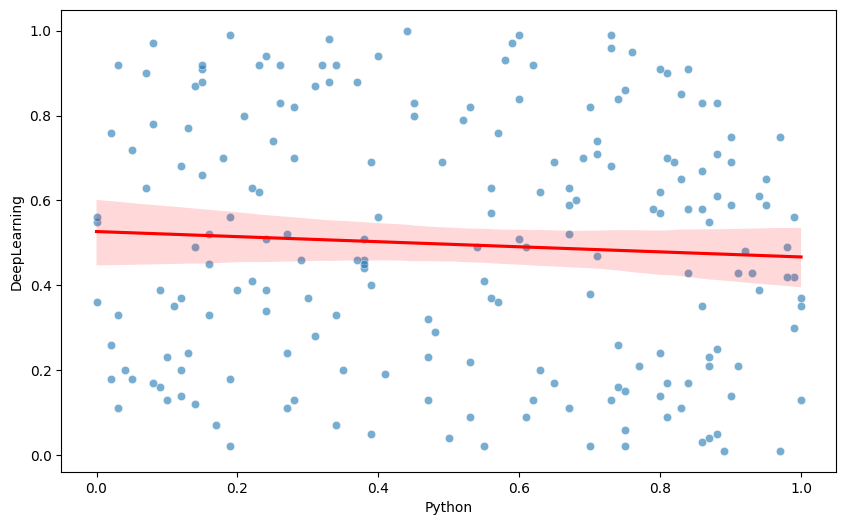

In [38]:
plt.figure(figsize = (10, 6))
sns.scatterplot( x = "Python" , y = "DeepLearning" , data = df , alpha = 0.6)
sns.regplot(x = "Python" , y = "DeepLearning" , data = df , scatter = False , color = "red")
plt.show()

# **Create a histogram to visualize the distribution of "MachineLearning" scores.**

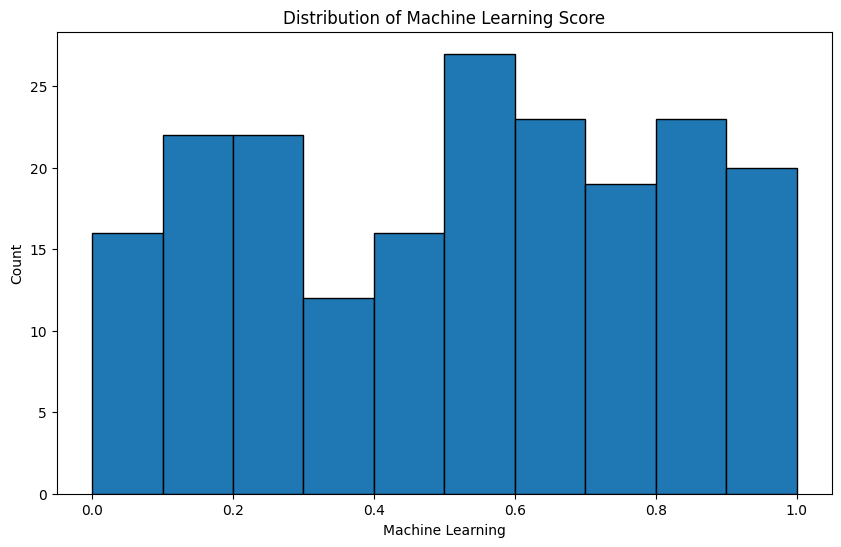

In [40]:
plt.figure(figsize = (10,6))
df["MachineLearning"].plot(kind = "hist" , edgecolor = "black")
plt.xlabel("Machine Learning")
plt.ylabel("Count")
plt.title("Distribution of Machine Learning Score")
plt.show()

# **Find the students who scored above 0.9 in all subjects (Python, DeepLearning, MachineLearning, BigData).**

In [42]:
df.columns

Index(['Python', 'DeepLearning', 'MachineLearning', 'BigData',
       'CloudComputing', 'Placement'],
      dtype='object')

In [46]:
above_09 =   df[(df["Python"] > 0.9) & (df["DeepLearning"]>0.9) & (df["MachineLearning"] > 0.9) & (df["BigData"]>0.9)]

In [47]:
above_09

,Python,DeepLearning,MachineLearning,BigData,CloudComputing,Placement


# **Calculate the average "BigData" score for students who got placed and those who didn't.**

In [49]:
avg_bg =  df.groupby("Placement")["BigData"].mean()
avg_bg

Placement
No     0.479286
Yes    0.506638
Name: BigData, dtype: float64

# **What is the most common score range for "CloudComputing" among placed students?**

In [57]:
placed = df[df["Placement"] == "Yes"]

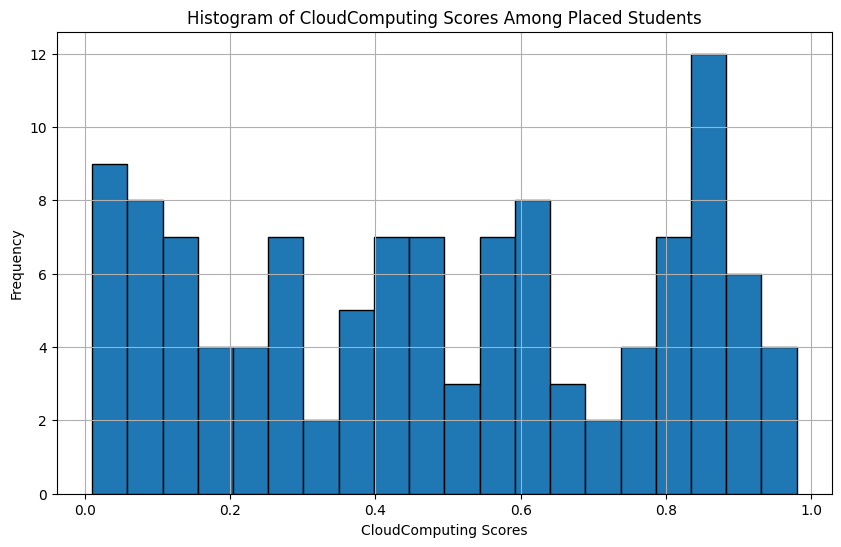

In [68]:
plt.figure(figsize= (10,6))
plt.hist(placed["CloudComputing"] , edgecolor = "black" , bins = 20)
plt.xlabel("CloudComputing Scores")
plt.ylabel("Frequency")
plt.title("Histogram of CloudComputing Scores Among Placed Students")
plt.grid(True)
plt.show()

**The bin with the highest bar (i.e., the highest frequency) represents the most common score range within the dataset**.

**therefore most common range will be : 0.84 to 0.89**

# **Perform a t-test to determine if there is a significant difference in "Python" scores between placed and non-placed students.**

In [69]:
from scipy import stats

In [73]:
# Step 1: Split the dataset into two groups - one for placed students and one for non-placed students.
placed = df[df["Placement"]== "Yes"]
not_placed = df[df["Placement"]== "No"]

#Step 2: Calculate the mean ("Python" scores) for each group.
python_placed = placed["Python"]
python_not_placed = not_placed["Python"]

pp_mean = python_placed.mean()
pnp_mean = python_not_placed.mean()

#Step 3: Calculate the standard deviation for each group.
pp_std = python_placed.std()
pnp_std = python_not_placed.std()

#Step 4: Determine the sample sizes (number of students) for each group.
pp_len = len(python_placed)
pnp_len = len(python_not_placed)

In [74]:
#Step 5: Perform the t-test to compare the means of the two groups.
t_stat , p_value = stats.ttest_ind(python_placed , python_not_placed)
alpha = 0.05

if p_value < alpha:
   print(f"There is a significant difference in 'Python' scores between placed and non-placed students (p-value = {p_value}).")
else :
   print(f"There is no significant difference in 'Python' scores between placed and non-placed students (p-value = {p_value}).")

There is no significant difference in 'Python' scores between placed and non-placed students (p-value = 0.7989458620191394).


# **Create a box plot to visualize the spread of "MachineLearning" scores.**

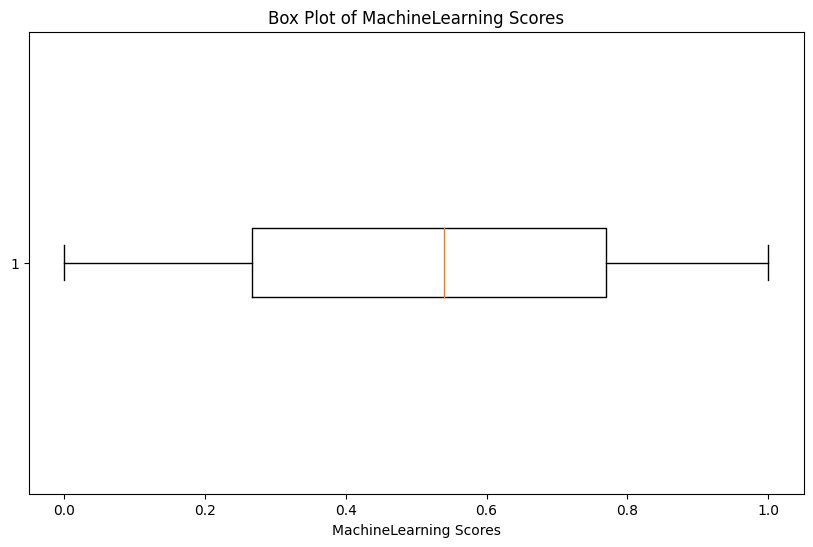

In [81]:
plt.figure(figsize = (10,6))
plt.boxplot(df["MachineLearning"] , vert = False)
plt.title('Box Plot of MachineLearning Scores')
plt.xlabel('MachineLearning Scores')
plt.show()

# **Show Correlation between every columns**

In [82]:
df.columns

Index(['Python', 'DeepLearning', 'MachineLearning', 'BigData',
       'CloudComputing', 'Placement'],
      dtype='object')

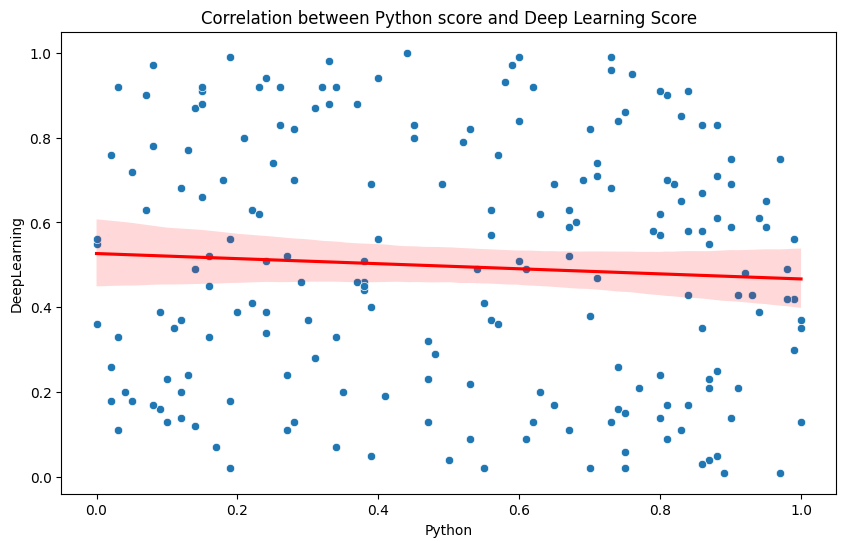

In [89]:
plt.figure(figsize = (10,6))
sns.scatterplot( x = "Python" , y = "DeepLearning" , data = df )
sns.regplot(x = "Python" , y = "DeepLearning" , data = df , scatter = False ,color = "red")
plt.title("Correlation between Python score and Deep Learning Score")
plt.show()

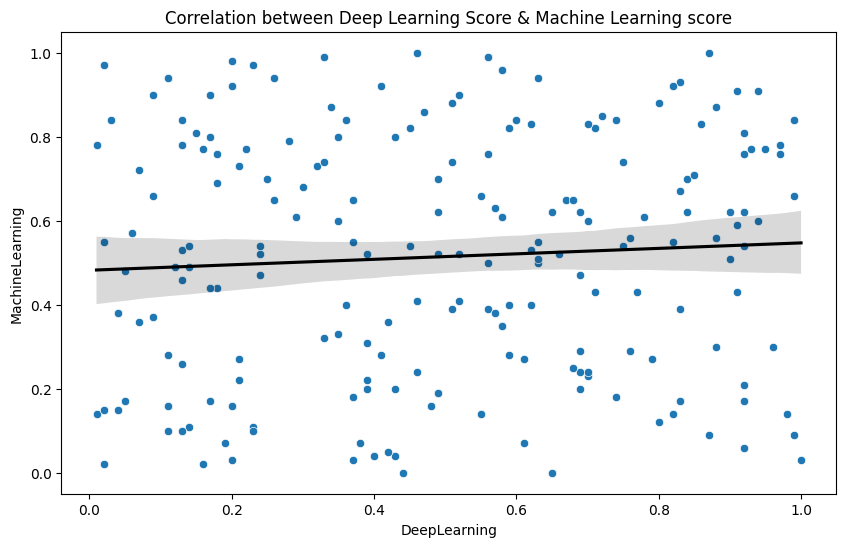

In [90]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "DeepLearning" , y = "MachineLearning" , data = df)
sns.regplot(x = "DeepLearning" , y = "MachineLearning" , data = df , scatter = False , color = "black")
plt.title("Correlation between Deep Learning Score & Machine Learning score")
plt.show()

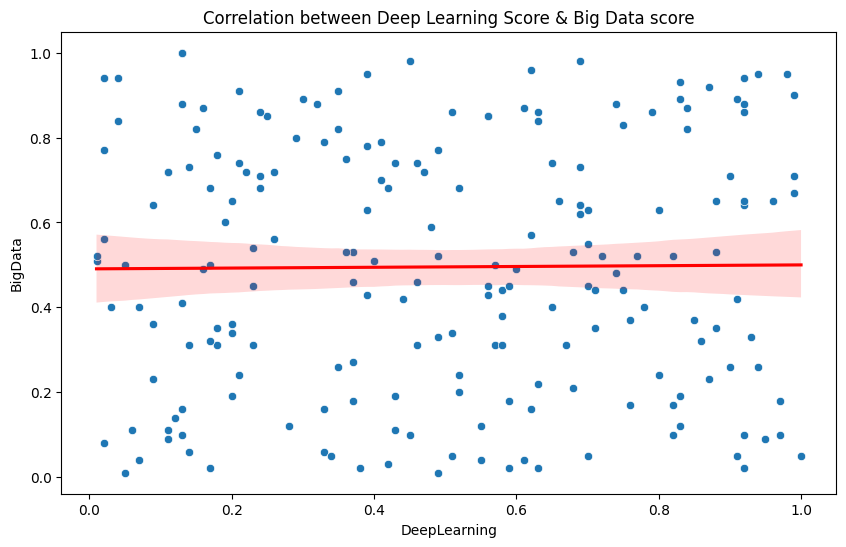

In [92]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "DeepLearning" , y = "BigData" , data = df)
sns.regplot(x = "DeepLearning" , y = "BigData" , data = df , scatter = False , color = "red")
plt.title("Correlation between Deep Learning Score & Big Data score")
plt.show()

**or**

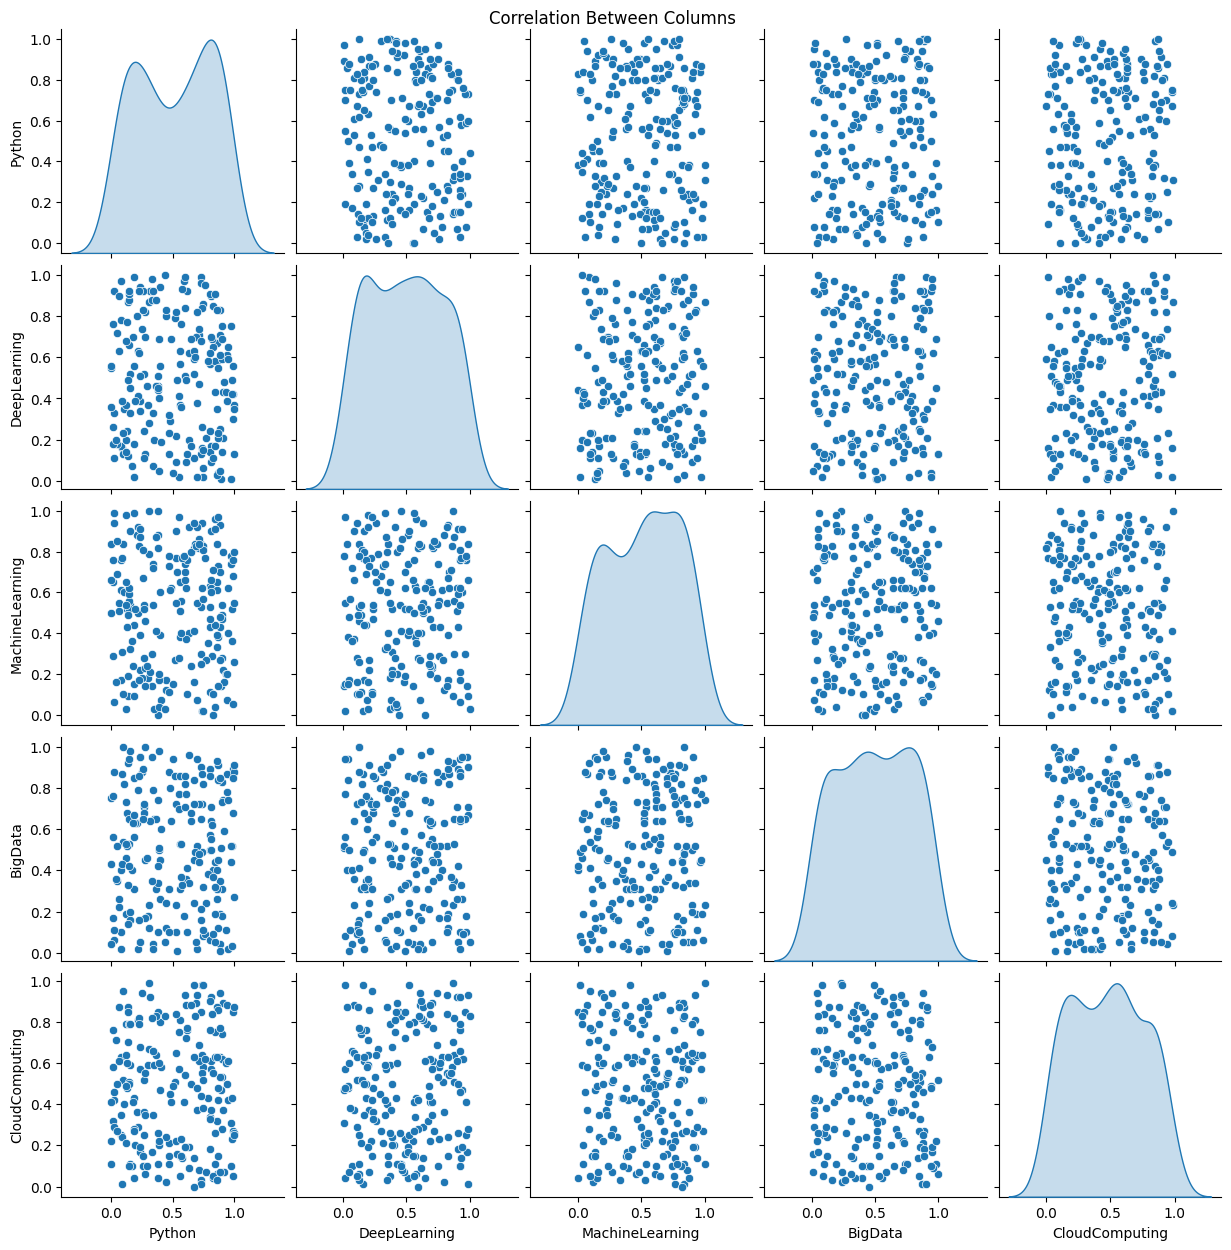

In [99]:
cols = ["Python" , 'DeepLearning', 'MachineLearning', 'BigData', 'CloudComputing' ]

sns.pairplot(df[cols] , diag_kind = "kde")
plt.suptitle("Correlation Between Columns " , y = 1)

plt.show()

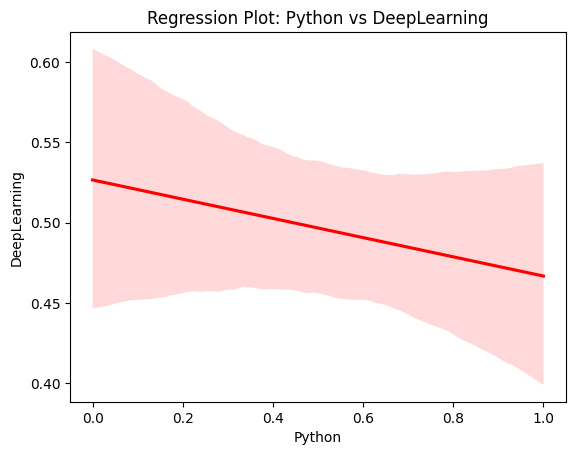

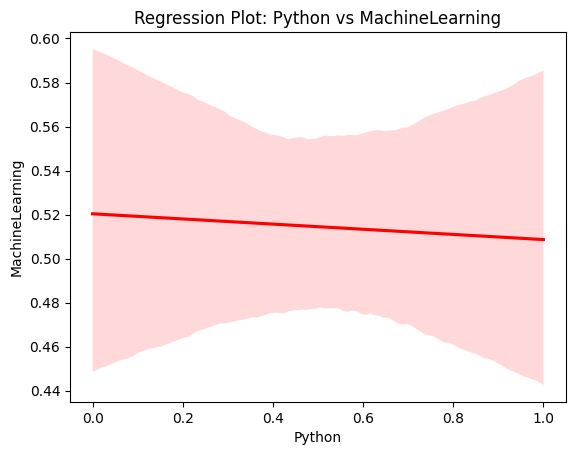

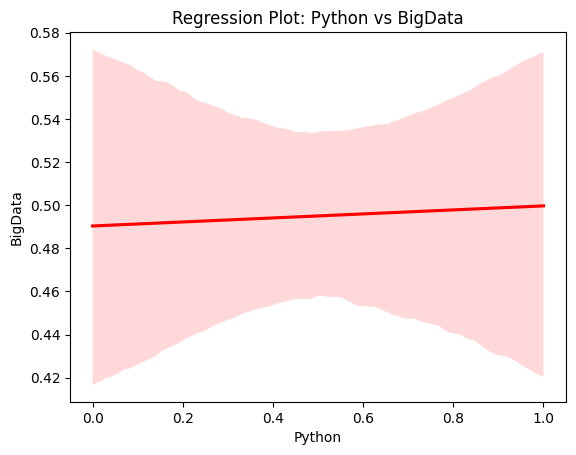

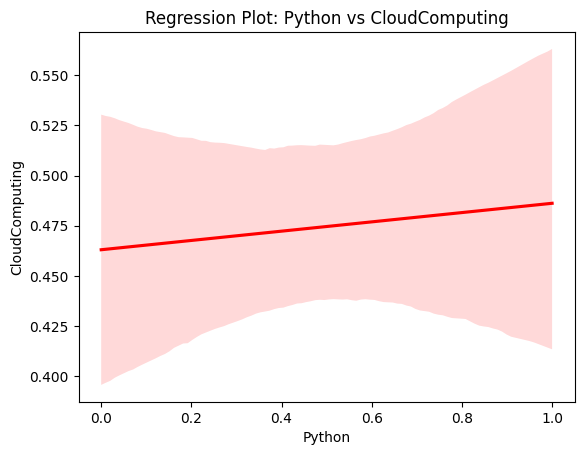

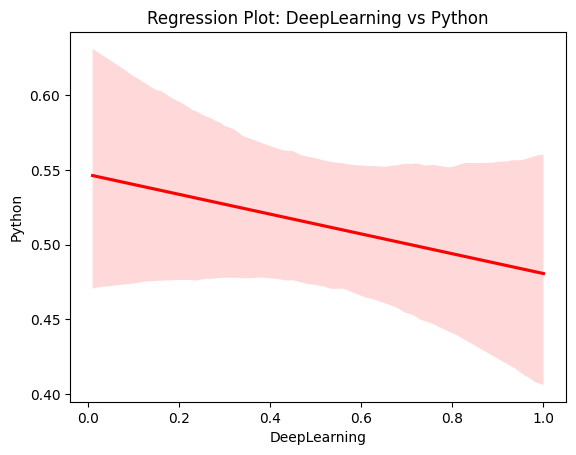

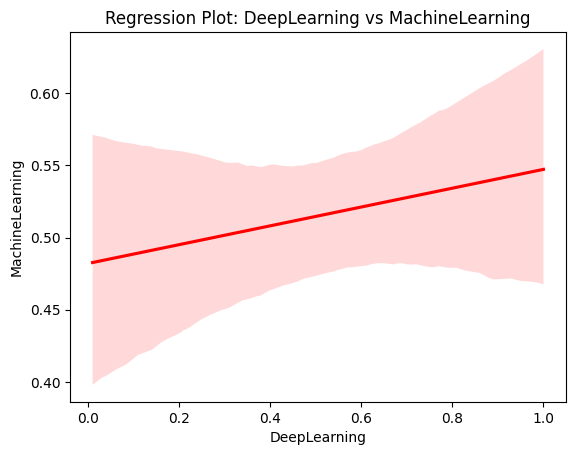

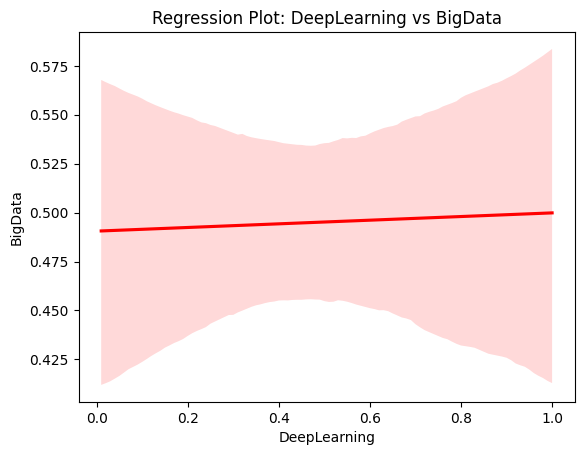

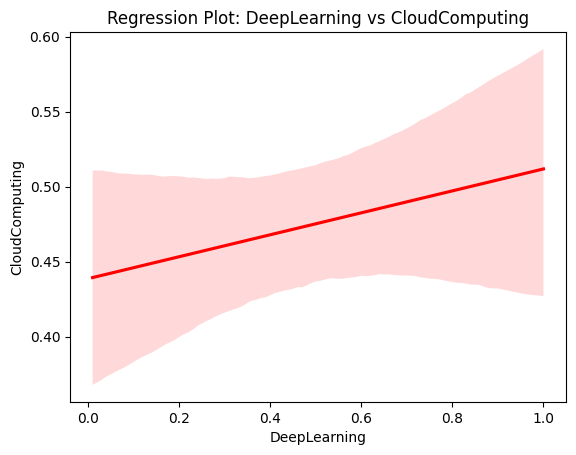

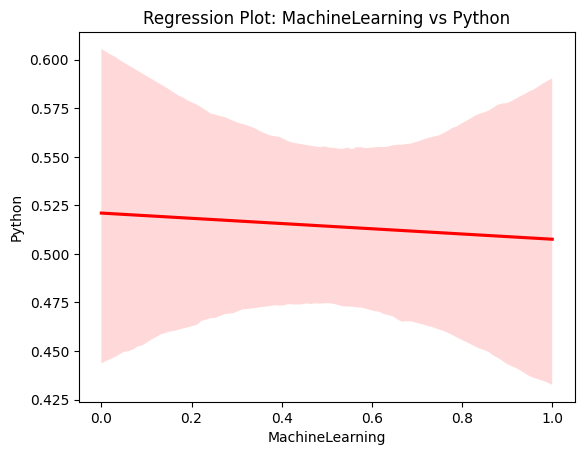

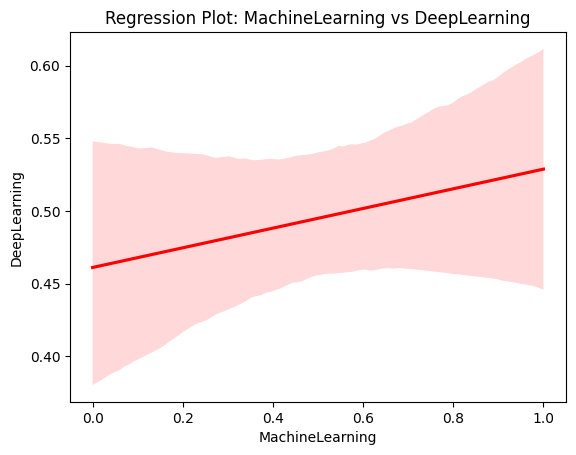

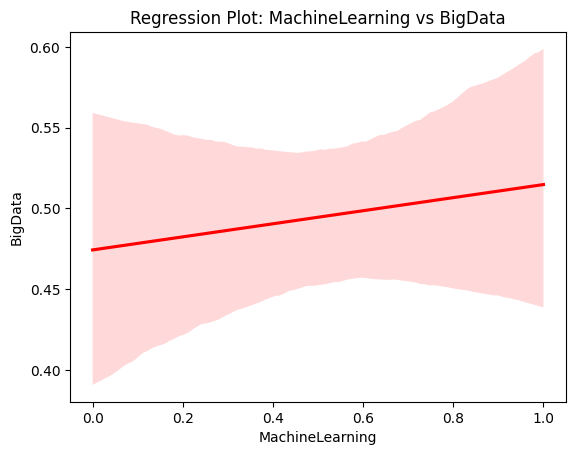

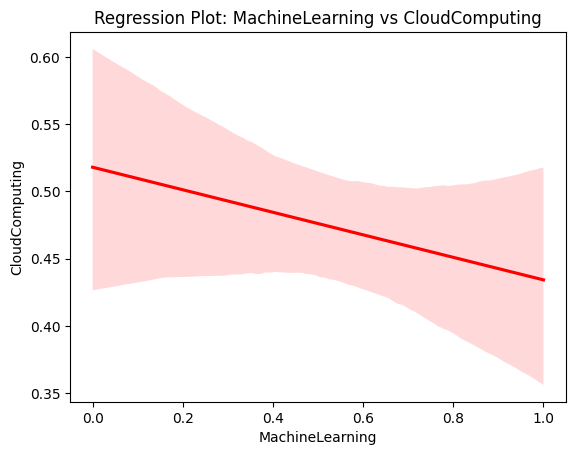

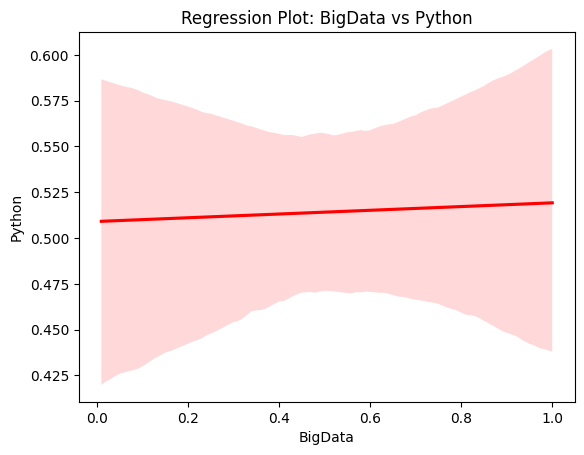

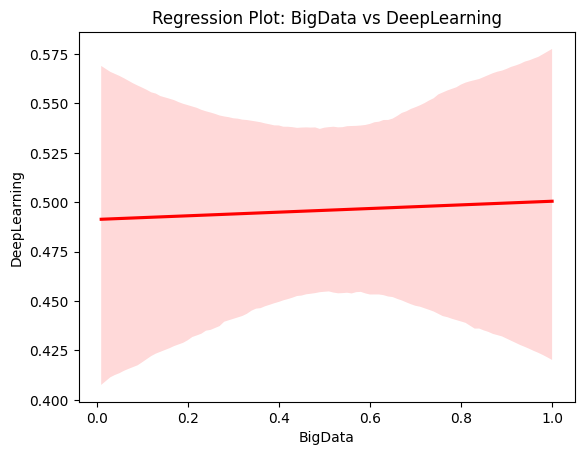

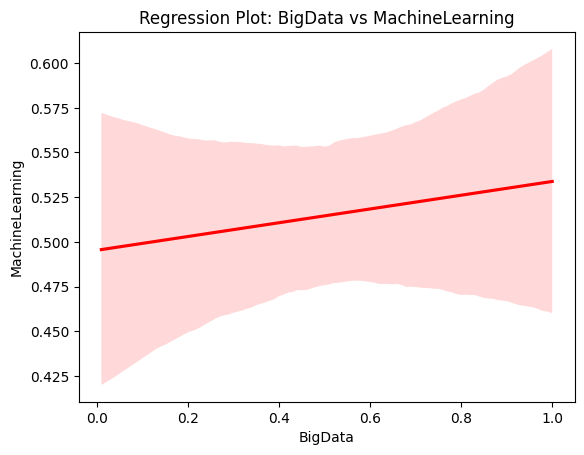

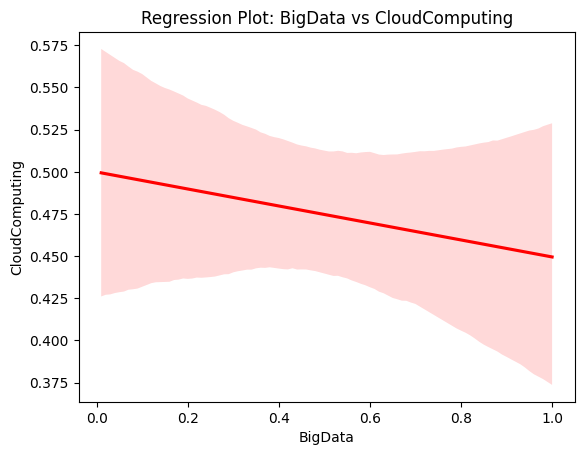

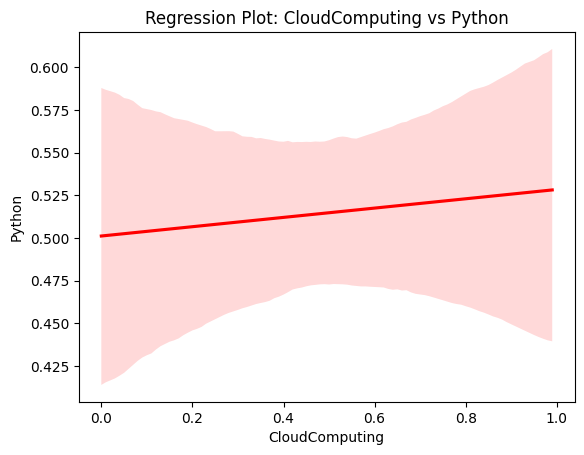

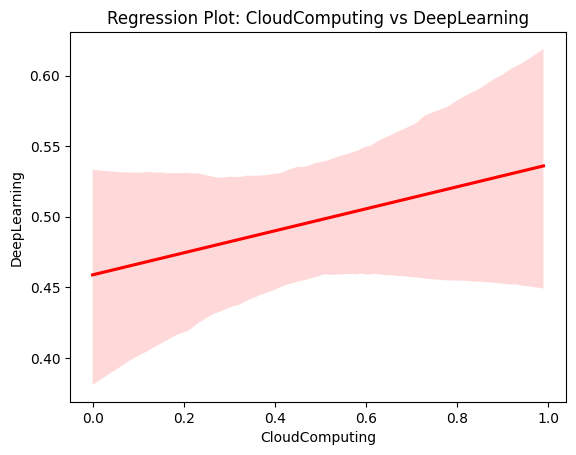

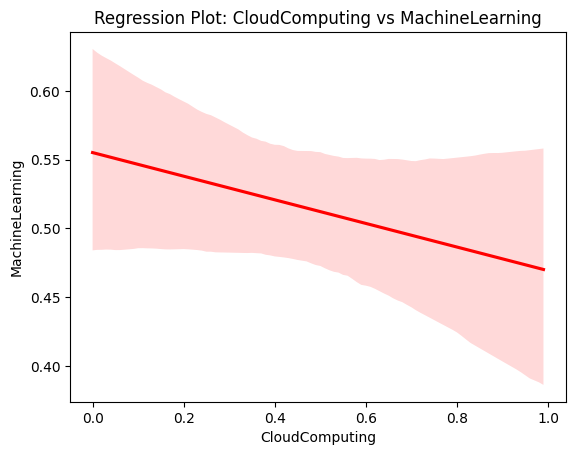

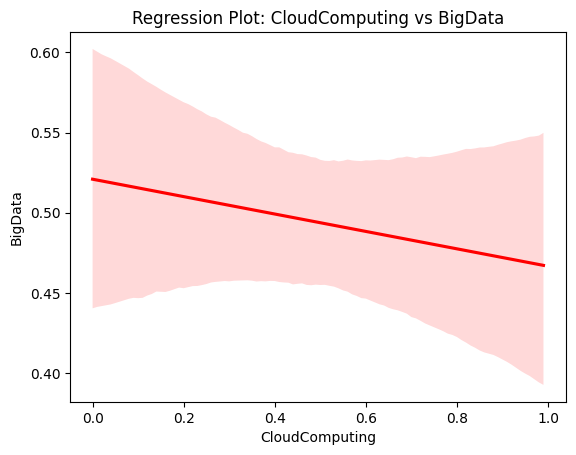

In [102]:
for i in cols:
  for j in cols:
    if i != j :
      sns.regplot(x = i , y = j , data = df , scatter = False , color = "red")
      plt.title(f"Regression Plot: {i} vs {j}")
      plt.show()